<a href="https://colab.research.google.com/github/nelsooooon/BFDLFinal/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Klasifikasi Gambar: [Input Nama Dataset]
- **Nama:** Nelson Ahli
- **Email:** ahlinelson04@gmail.com | m320d5y1490@student.devacademy.id
- **ID Dicoding:** M320D5Y1490

## Import Semua Packages/Library yang Digunakan

In [ ]:
from google.colab import files
from PIL import Image

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import shutil

import cv2
import random
from skimage import img_as_ubyte, io
from skimage.exposure import adjust_gamma
from skimage.transform import rotate, AffineTransform, warp

from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm as tq

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.layers import InputLayer, Conv2D, SeparableConv2D, MaxPooling2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential, Model

## Data Preparation

### Data Loading

In [ ]:
files.upload()
print("Success")

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pahlawannel","key":"f8aa1012aa246dab79fc8d67c3ef1c43"}'}

In [ ]:
# Download kaggle dataset and unzip the file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d puneet6060/intel-image-classification
!unzip intel-image-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: seg_train/seg_train/mountain/7506.jpg  
  inflating: seg_train/seg_train/mountain/7537.jpg  
  inflating: seg_train/seg_train/mountain/7539.jpg  
  inflating: seg_train/seg_train/mountain/7551.jpg  
  inflating: seg_train/seg_train/mountain/7560.jpg  
  inflating: seg_train/seg_train/mountain/7565.jpg  
  inflating: seg_train/seg_train/mountain/7578.jpg  
  inflating: seg_train/seg_train/mountain/7581.jpg  
  inflating: seg_train/seg_train/mountain/7586.jpg  
  inflating: seg_train/seg_train/mountain/7647.jpg  
  inflating: seg_train/seg_train/mountain/7652.jpg  
  inflating: seg_train/seg_train/mountain/7654.jpg  
  inflating: seg_train/seg_train/mountain/7662.jpg  
  inflating: seg_train/seg_train/mountain/767.jpg  
  inflating: seg_train/seg_train/mountain/7672.jpg  
  inflating: seg_train/seg_train/mountain/7679.jpg  
  inflating: seg_train/seg_train/mountain/7681.jpg  
  inflating: seg_train/seg_train/mountain/7693.jp

In [ ]:
# Direktori awal untuk train dan test
train_dir = "./seg_train/seg_train"
test_dir = "./seg_test/seg_test"
val_dir = "./seg_pred/seg_pred"

# Direktori baru untuk dataset gabungan
combined_dir = "./dataset"

In [ ]:
# Buat direktori baru untuk dataset gabungan
os.makedirs(combined_dir, exist_ok=True)

In [ ]:
# Salin file dan folder dari train
for category in os.listdir(train_dir):
    category_dir = os.path.join(train_dir, category)
    if os.path.isdir(category_dir):
        shutil.copytree(category_dir, os.path.join(combined_dir, category), dirs_exist_ok=True)

# Salin file dan folder dari test
for category in os.listdir(test_dir):
    category_dir = os.path.join(test_dir, category)
    if os.path.isdir(category_dir):
        shutil.copytree(category_dir, os.path.join(combined_dir, category), dirs_exist_ok=True)

# Salin file dan folder dari test
for category in os.listdir(val_dir):
    category_dir = os.path.join(val_dir, category)
    if os.path.isdir(category_dir):
        shutil.copytree(category_dir, os.path.join(combined_dir, category), dirs_exist_ok=True)

In [ ]:
def print_images_resolution(dataset):
    unique_sizes = set()
    total_images = 0

    for subdir in os.listdir(dataset):
        subdir_path = os.path.join(dataset, subdir)
        image_files = os.listdir(subdir_path)
        num_images = len(image_files)
        print(f"{subdir}: {num_images}")
        total_images += num_images

        for img_file in image_files:
            img_path = os.path.join(subdir_path, img_file)
            with Image.open(img_path) as img:
                unique_sizes.add(img.size)

        for size in unique_sizes:
            print(f"- {size}")
        print("---------------")

    print(f"\nTotal: {total_images}")

In [ ]:
print_images_resolution(combined_dir)

glacier: 2957
- (150, 146)
- (150, 120)
- (150, 149)
- (150, 110)
- (150, 123)
- (150, 142)
- (150, 119)
- (150, 97)
- (150, 135)
- (150, 76)
- (150, 150)
- (150, 134)
- (150, 105)
- (150, 102)
- (150, 143)
- (150, 111)
- (150, 72)
---------------
buildings: 2628
- (150, 146)
- (150, 120)
- (150, 149)
- (150, 110)
- (150, 123)
- (150, 142)
- (150, 119)
- (150, 97)
- (150, 135)
- (150, 76)
- (150, 150)
- (150, 134)
- (150, 105)
- (150, 102)
- (150, 124)
- (150, 143)
- (150, 111)
- (150, 72)
---------------
forest: 2745
- (150, 136)
- (150, 142)
- (150, 105)
- (150, 102)
- (150, 108)
- (150, 111)
- (150, 120)
- (150, 123)
- (150, 135)
- (150, 141)
- (150, 150)
- (150, 110)
- (150, 113)
- (150, 119)
- (150, 76)
- (150, 134)
- (150, 143)
- (150, 146)
- (150, 149)
- (150, 97)
- (150, 115)
- (150, 124)
- (150, 133)
- (150, 72)
---------------
street: 2883
- (150, 136)
- (150, 142)
- (150, 105)
- (150, 102)
- (150, 108)
- (150, 111)
- (150, 120)
- (150, 123)
- (150, 135)
- (150, 141)
- (150, 

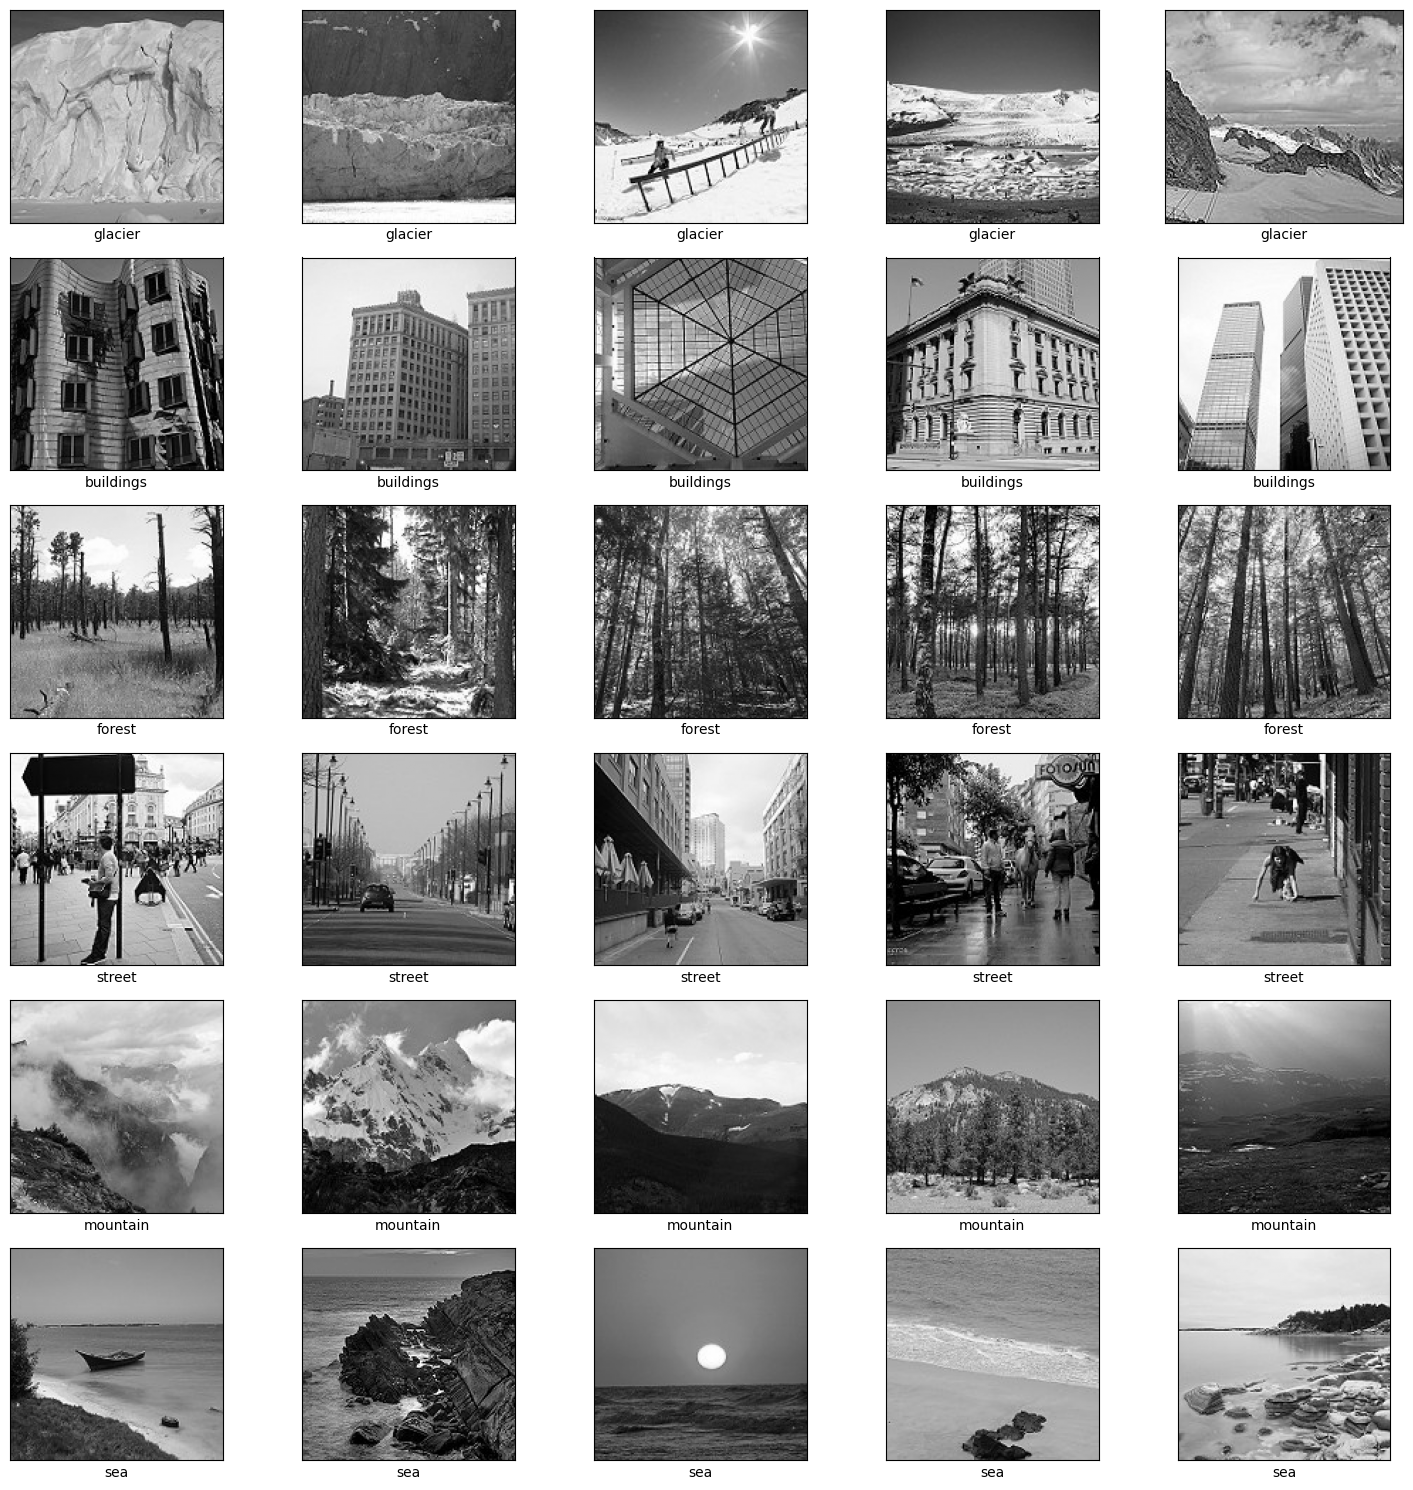

In [ ]:
# Membuat kamus yang menyimpan gambar untuk setiap kelas dalam data
seg_image = {}

# Tentukan path sumber train
for i in os.listdir(combined_dir):
    seg_image[i] = os.listdir(os.path.join(combined_dir, i))

# Menampilkan secara acak 5 gambar di bawah setiap dari 2 kelas dari data.
# Anda akan melihat gambar yang berbeda setiap kali kode ini dijalankan.
# Menampilkan secara acak 5 gambar di bawah setiap kelas dari data latih
fig, axs = plt.subplots(len(seg_image.keys()), 5, figsize=(15, 15))

for i, class_name in enumerate(os.listdir(combined_dir)):
    images = np.random.choice(seg_image[class_name], 5, replace=False)

    for j, image_name in enumerate(images):
        img_path = os.path.join(combined_dir, class_name, image_name)
        img = Image.open(img_path).convert("L")  # Konversi menjadi skala keabuan
        axs[i, j].imshow(img, cmap='gray')
        axs[i, j].set(xlabel=class_name, xticks=[], yticks=[])


fig.tight_layout()

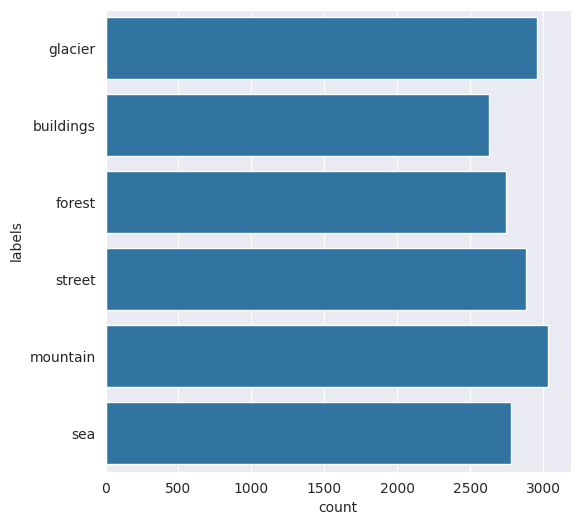

In [ ]:
# Buat daftar yang menyimpan data untuk setiap nama file, path file, dan label dalam data
file_name = []
labels = []
full_path = []

# Dapatkan nama file gambar, path file, dan label satu per satu dengan looping, dan simpan sebagai dataframe
for path, subdirs, files in os.walk(combined_dir):
    for name in files:
        full_path.append(os.path.join(path, name))
        labels.append(path.split('/')[-1])
        file_name.append(name)

distribution_train = pd.DataFrame({"path":full_path, 'file_name':file_name, "labels":labels})

# Plot distribusi gambar di setiap kelas
Label = distribution_train['labels']
plt.figure(figsize = (6,6))
sns.set_style("darkgrid")
plot_data = sns.countplot(Label)

### Data Preprocessing

In [ ]:
# Membuat fungsi untuk melakukan rotasi berlawanan arah jarum jam
def anticlockwise_rotation(img):
    img = cv2.cvtColor(img, 0)
    img = cv2.resize(img, (224,224))
    sudut = random.randint(0,180)
    return rotate(img, sudut)

# Membuat fungsi untuk melakukan rotasi searah jarum jam
def clockwise_rotation(img):
    img = cv2.cvtColor(img, 0)
    img = cv2.resize(img, (224,224))
    sudut = random.randint(0,180)
    return rotate(img, -sudut)

# Membuat fungsi untuk membalik gambar secara vertikal dari atas ke bawah
def flip_up_down(img):
    img = cv2.cvtColor(img, 0)
    img = cv2.resize(img, (224,224))
    return np.flipud(img)

# Membuat fungsi untuk memberikan efek peningkatan kecerahan pada gambar
def add_brightness(img):
    img = cv2.cvtColor(img, 0)
    img = cv2.resize(img, (224,224))
    img = adjust_gamma(img, gamma=0.5,gain=1)
    return img

# Membuat fungsi untuk memberikan efek blur pada gambar
def blur_image(img):
    img = cv2.cvtColor(img, 0)
    img = cv2.resize(img, (224,224))
    return cv2.GaussianBlur(img, (9,9),0)

# Membuat fungsi untuk memberikan efek pergeseran acak pada gambar
def sheared(img):
    img = cv2.cvtColor(img, 0)
    img = cv2.resize(img, (224,224))
    transform = AffineTransform(shear=0.2)
    shear_image = warp(img, transform, mode="wrap")
    return shear_image

# Membuat fungsi untuk melakukan pergeseran melengkung pada gambar
def warp_shift(img):
    img = cv2.cvtColor(img, 0)
    img = cv2.resize(img, (224,224))
    transform = AffineTransform(translation=(0,40))
    warp_image = warp(img, transform, mode="wrap")
    return warp_image

In [ ]:
# Membuat variabel transformasi yang akan menyimpan semua proses pra-pemrosesan yang telah dilakukan sebelumnya
transformations = { 'rotate anticlockwise': anticlockwise_rotation,
                    'rotate clockwise': clockwise_rotation,
                    'warp shift': warp_shift,
                    'blurring image': blur_image,
                    'add brightness' : add_brightness,
                    'flip up down': flip_up_down,
                    'shear image': sheared
                  }

for i, class_name in enumerate(os.listdir(combined_dir)):
    img_path = os.path.join(combined_dir, class_name)

    images = [] # Penyimpanan gambar yang telah melalui pra-pemrosesan
    # Baca nama gambar dari folder dan tambahkan path ke dalam array "images"
    for im in os.listdir(img_path):
        images.append(os.path.join(img_path,im))

    # Jumlah gambar yang akan ditambahkan dengan hasil transformasi augmentasi, jumlahnya disesuaikan sesuai kebutuhan
    # Variabel untuk melakukan iterasi sampai jumlah gambar yang ditentukan dalam images_to_generate
    images_to_generate = 2000
    j = 1

    while j <= images_to_generate:
        image = random.choice(images)
        try:
            original_image = io.imread(image)
            transformed_image = None
            n = 0      # Variabel untuk melakukan iterasi sampai jumlah transformasi yang akan diterapkan
            transformation_count = random.randint(1, len(transformations)) # Pilih jumlah transformasi acak yang akan diterapkan pada gambar

            while n < transformation_count:
                key = random.choice(list(transformations)) # Secara acak memilih dan memanggil metode
                transformed_image = transformations[key](original_image)
                n = n + 1

            new_image_path = "%s/augmented_image_%s.jpg" %(img_path, j)
            transformed_image = img_as_ubyte(transformed_image)  # Mengonversi gambar ke format byte yang tidak ditandatangani, dengan nilai dalam [0, 255]
            cv2.imwrite(new_image_path, transformed_image)  # Simpan hasil transformasi augmentasi pada gambar ke path yang ditentukan
            j += 1
        except ValueError as e:
            print('could not read the', image , ':', e, 'hence skipping it.')

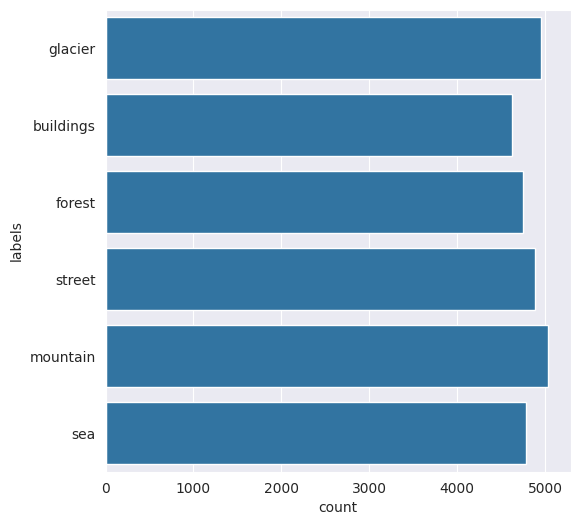

In [ ]:
# Buat daftar yang menyimpan data untuk setiap nama file, path file, dan label dalam data
file_name = []
labels = []
full_path = []

# Dapatkan nama file gambar, path file, dan label satu per satu dengan looping, dan simpan sebagai dataframe
for path, subdirs, files in os.walk(combined_dir):
    for name in files:
        full_path.append(os.path.join(path, name))
        labels.append(path.split('/')[-1])
        file_name.append(name)

distribution_train = pd.DataFrame({"path":full_path, 'file_name':file_name, "labels":labels})

# Plot distribusi gambar di setiap kelas
Label = distribution_train['labels']
plt.figure(figsize = (6,6))
sns.set_style("darkgrid")
plot_data = sns.countplot(Label)

#### Split Dataset

In [ ]:
file_name = []
labels = []
full_path = []
for path, subdirs, files in os.walk(combined_dir):
    for name in files:
        full_path.append(os.path.join(path, name))
        labels.append(path.split('/')[-1])
        file_name.append(name)

# Memasukkan variabel yang sudah dikumpulkan pada looping di atas menjadi sebuah dataframe agar rapi
df = pd.DataFrame({"path":full_path,'file_name':file_name,"labels":labels})
# Melihat jumlah data gambar pada masing-masing label
df.groupby(['labels']).size()

,0
labels,
buildings,4628
forest,4745
glacier,4957
mountain,5037
sea,4784
street,4883


In [ ]:
# Variabel yang digunakan pada pemisahan data ini di mana variabel x = data path dan y = data labels
X= df['path']
y= df['labels']

# Split dataset awal menjadi data train dan test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=300)

In [ ]:
# Menyatukan ke dalam masing-masing dataframe
df_tr = pd.DataFrame({'path':X_train,'labels':y_train,'set':'train'})
df_te = pd.DataFrame({'path':X_test,'labels':y_test,'set':'test'})

In [ ]:
# Gabungkan DataFrame df_tr dan df_te
df_all = pd.concat([df_tr, df_te], ignore_index=True)

print('===================================================== \n')
print(df_all.groupby(['set', 'labels']).size(), '\n')
print('===================================================== \n')

# Cek sampel data
print(df_all.sample(5))

# Memanggil dataset asli yang berisi keseluruhan data gambar yang sesuai dengan labelnya
datasource_path = "./dataset/"
# Membuat variabel Dataset, tempat menampung data yang telah dilakukan pembagian data training dan testing
dataset_path = "Dataset-Final/"


set    labels   
test   buildings     939
       forest        962
       glacier       982
       mountain     1004
       sea           947
       street        973
train  buildings    3689
       forest       3783
       glacier      3975
       mountain     4033
       sea          3837
       street       3910
dtype: int64 


                                              path    labels    set
23489  ./dataset/mountain/augmented_image_1597.jpg  mountain   test
20405                       ./dataset/sea/3041.jpg       sea  train
26860                    ./dataset/forest/3368.jpg    forest   test
12798    ./dataset/glacier/augmented_image_513.jpg   glacier  train
17234       ./dataset/sea/augmented_image_1174.jpg       sea  train


In [ ]:
for index, row in tq(df_all.iterrows()):
    # Deteksi filepath
    file_path = row['path']
    if os.path.exists(file_path) == False:
            file_path = os.path.join(datasource_path,row['labels'],row['image'].split('.')[0])

    # Buat direktori tujuan folder
    if os.path.exists(os.path.join(dataset_path,row['set'],row['labels'])) == False:
        os.makedirs(os.path.join(dataset_path,row['set'],row['labels']))

    # Tentukan tujuan file
    destination_file_name = file_path.split('/')[-1]
    file_dest = os.path.join(dataset_path,row['set'],row['labels'],destination_file_name)

    # Salin file dari sumber ke tujuan
    if os.path.exists(file_dest) == False:
        shutil.copy2(file_path,file_dest)

0it [00:00, ?it/s]

## Modelling

In [ ]:
# Definisikan direktori training dan test
TRAIN_DIR = "Dataset-Final/train/"
TEST_DIR = "Dataset-Final/test/"

for i, class_name in enumerate(os.listdir(TRAIN_DIR)):
    train_path = os.path.join(TRAIN_DIR, class_name)
    print(f"Total number of {class_name} images in training set: ",len(os.listdir(train_path)))

print("============================================================")

for i, class_name in enumerate(os.listdir(TEST_DIR)):
    test_path = os.path.join(TEST_DIR, class_name)
    print(f"Total number of {class_name} images in test set: ",len(os.listdir(test_path)))

Total number of glacier images in training set:  3975
Total number of buildings images in training set:  3689
Total number of forest images in training set:  3783
Total number of street images in training set:  3910
Total number of mountain images in training set:  4033
Total number of sea images in training set:  3837
Total number of glacier images in test set:  982
Total number of buildings images in test set:  939
Total number of forest images in test set:  962
Total number of street images in test set:  973
Total number of mountain images in test set:  1004
Total number of sea images in test set:  947


In [ ]:
# Buat objek ImageDataGenerator yang menormalkan gambar
datagen = ImageDataGenerator(rescale=1/255.,
                             validation_split = 0.2)
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = datagen.flow_from_directory(TRAIN_DIR,
                                              batch_size=32,
                                              target_size=(150,150),
                                              color_mode="grayscale",
                                              class_mode='categorical',
                                              subset='training',
                                              shuffle=True)

validation_generator = datagen.flow_from_directory(TRAIN_DIR,
                                                   batch_size=32,
                                                   target_size=(150,150),
                                                   color_mode="grayscale",
                                                   class_mode='categorical',
                                                   subset='validation',
                                                   shuffle=False)

test_generator = test_datagen.flow_from_directory(TEST_DIR,
                                                  batch_size=1,
                                                  target_size=(150,150),
                                                  color_mode="grayscale",
                                                  class_mode='categorical',
                                                  shuffle=False)

Found 18584 images belonging to 6 classes.
Found 4643 images belonging to 6 classes.
Found 5807 images belonging to 6 classes.


In [ ]:
tf.keras.backend.clear_session()

####################### Init sequential model ##################################
model_1 = Sequential()

# ######################### Input layer with Fully Connected Layer ################################
# 1st Convolutional layer, Batch Normalization layer, and Pooling layer
model_1.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(150,150,1)))
model_1.add(BatchNormalization())
model_1.add(MaxPool2D((2, 2)))

# 2nd Convolutional layer, Batch Normalization layer, and Pooling layer
model_1.add(Conv2D(32, (4, 4),padding='same', activation='relu'))
model_1.add(BatchNormalization())
model_1.add(MaxPool2D((2, 2)))

# 3rd Convolutional layer, Batch Normalization layer, and Pooling layer
model_1.add(Conv2D(32, (7, 7), padding='same', activation='relu'))
model_1.add(BatchNormalization())
model_1.add(MaxPool2D((2, 2)))

# Flatten layer
model_1.add(Flatten())
# 1nd Dense Layer
model_1.add(Dense(128, activation = 'relu'))
# 1nd Dropout Layer
model_1.add(Dropout(0.5))
# 2nd Dense Layer
model_1.add(Dense(64, activation = 'relu'))
# 2nd Dropout Layer
model_1.add(Dropout(0.3))

# Final Dense layer => For output prediction 1 mean (binary class in dataset), sigmoid for binary cases
model_1.add(Dense(6, activation='softmax'))
######################### Fully Connected Layer ################################

######################### Compile Model ################################
model_1.compile(optimizer=tf.keras.optimizers.RMSprop(),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Summary of the Model Architecture
print(model_1.summary())

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 150, 150, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 75, 75, 32)     │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 75, 75, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 37, 37, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 37, 37, 32)     │        50,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 37, 37, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 18, 18, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 10368)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,327,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,403,206 (5.35 MB)

 Trainable params: 1,403,014 (5.35 MB)

 Non-trainable params: 192 (768.00 B)

None


In [ ]:
class_counts = []
class_weights = {}

for i, class_name in enumerate(os.listdir(TRAIN_DIR)):
    train_path = os.path.join(combined_dir, class_name)
    count = len(os.listdir(train_path))
    class_counts[i] = count

total_count = sum(class_counts.values())
total_class = len(class_counts)

for i in range(total_class):
  weight = total_count / (total_class * class_counts[i])
  class_weights[i] = weight

print(class_weights)

%time

# Fitting / training model
history_1 = model_1.fit(train_generator,
                        epochs=30,
                        batch_size=32,
                        validation_data=validation_generator,
                        class_weight = class_weights)

{0: 0.9761952794028647, 1: 1.0455920484010373, 2: 1.0198103266596417, 3: 0.990989146016793, 4: 0.9606908874329958, 5: 1.0114966555183946}
CPU times: user 11 µs, sys: 2 µs, total: 13 µs
Wall time: 74.1 µs


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
581/581 ━━━━━━━━━━━━━━━━━━━━ 48s 59ms/step - accuracy: 0.2664 - loss: 2.6095 - val_accuracy: 0.4945 - val_loss: 1.2092
Epoch 2/30
581/581 ━━━━━━━━━━━━━━━━━━━━ 22s 39ms/step - accuracy: 0.4191 - loss: 1.3905 - val_accuracy: 0.5761 - val_loss: 1.0802
Epoch 3/30
581/581 ━━━━━━━━━━━━━━━━━━━━ 23s 39ms/step - accuracy: 0.5077 - loss: 1.1996 - val_accuracy: 0.6694 - val_loss: 1.0146
Epoch 4/30
581/581 ━━━━━━━━━━━━━━━━━━━━ 23s 39ms/step - accuracy: 0.5898 - loss: 1.0420 - val_accuracy: 0.6905 - val_loss: 0.9993
Epoch 5/30
581/581 ━━━━━━━━━━━━━━━━━━━━ 25s 43ms/step - accuracy: 0.6231 - loss: 0.9777 - val_accuracy: 0.7017 - val_loss: 0.8163
Epoch 6/30
581/581 ━━━━━━━━━━━━━━━━━━━━ 24s 41ms/step - accuracy: 0.6643 - loss: 0.8941 - val_accuracy: 0.5753 - val_loss: 1.1908
Epoch 7/30
581/581 ━━━━━━━━━━━━━━━━━━━━ 23s 39ms/step - accuracy: 0.6954 - loss: 0.8120 - val_accuracy: 0.7331 - val_loss: 0.8631
Epoch 8/30
581/581 ━━━━━━━━━━━━━━━━━━━━ 23s 40ms/step - accuracy: 0.6998 - loss: 0.8001 - 

## Evaluasi dan Visualisasi

## Konversi Model

## Inference (Optional)